<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/main/tps/2c2024/ICDIC_TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo Práctico 4: Regresión Lineal Generalizada

**Objetivos:** Con este trabajo práctico se busca que los alumnos completen la ejercitación en modelos de regresión lineal, extendiendo el proceso de inferencia a modelos que difieran del tradicional de errores normales. Esto se hará a partir de 3 ejercicios de distinto tipo:

- Regresión logística
- Regresión categórica
- Distribución de Poisson siguiendo la ley de Guttenberg-Richter

**Librerías:** En este trabajo se utilizará

*   Numpy: matemática básica y definición de matrices y vectores; simulación de variables aleatorias
*   Seaborn: construcción de gráficos
*   Bambi: Librería basada en PyMC para la inferencia estadística utilizando cadenas de Markov

También necesitaremos de la librería ArviZ para ver los resultados de nuestra inferencia.

In [ ]:
# Instalación e import de Bambi
try:
  import bambi as bmb
except:
  !pip install bambi
  import bambi as bmb

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import pandas as pd
import io

# para registrar el tiempo de corrida
import datetime

In [ ]:
start_datetime = datetime.datetime.now()

print('Inicio de corrida: ',start_datetime)

Grupo:

Integrantes:

*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX

## Ejercicio 1: Curvas de fragilidad en Haití

En este primer ejercicio vamos a utilizar una regresión logística para ajustar una curva de fragilidad (probabilidad de colapso en función de variables predictoras) en estructuras en Haití, en base a un set de datos de daños por sismo `haiti_damage_database_tp4_csv`.

### Datos



In [ ]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving haiti_damage_database_tp4.csv to haiti_damage_database_tp4.csv


In [ ]:
#Se crea un DataFrame
df_haiti = pd.read_csv(io.BytesIO(uploaded['haiti_damage_database_tp4.csv']))
df_haiti.head()

,PGA,colapso,Structure,Fondation
0,16.156,False,Structure en béton armé,Dalle/pose sur Grade
1,35.219,True,Structure en béton armé,Dalle/pose sur Grade
2,42.054,False,Structure en béton armé,Dalle/pose sur Grade
3,20.337,False,Structure en béton armé,Dalle/pose sur Grade
4,17.512,False,Structure en béton,Dalle/pose sur Grade


El dataset contiene 4 columnas:
- **PGA**: La máxima aceleración registrada en el suelo
- **colapso**: Si la estructura colapsó o no durante el sismo
- **Structure**: La tipología estructural (hormigón, hormigón armado, muros portantes, etc.)
- **Fondation**: El tipo de fundación (superficial, profunda, elevada)

Si vemos como vinieron los datos, vamos a encontrar algunos problemas. Por un lado, el PGA es un objeto, así como las variables categóricas Structure y Fondation

In [ ]:
df_haiti.dtypes

,0
PGA,object
colapso,bool
Structure,object
Fondation,object


Prestando más atención, esto ocurre en `PGA` porque en vez de `np.nan` hay un valor nulo que se llama "#N/D". ¡Debiéramos convertir todos estos datos a números!

También sería ideal cambiar los otros datos a categorías (y eliminar las nulas).

In [ ]:
print('PGA',df_haiti['PGA'].unique())

print('Structure',df_haiti['Structure'].unique())

print('Fondation',df_haiti['Fondation'].unique())

PGA ['16.156' '35.219' '42.054' '20.337' '17.512' '42.356' '18.915' '40.917'
 '28.534' '47.812' '73.409' '16.52' '23.248' '11.426' '14.859' '26.587'
 '23.983' '16.2' '14.66' '11.374' nan '21.067' '16.403' '15.394' '16.297'
 '36.949' '12.921' '8.7235' '17.607' '24.355' '12.887' '18.787' '26.988'
 '43.048' '12.141' '#N/D' '39.423' '9.916' '33.896' '42.258' '7.9522'
 '42.504']
Structure ['Structure en béton armé' 'Structure en béton'
 'Structure en bois et en tole' 'Murs porteurs'
 'Structure en acier et en tole' nan]
Fondation ['Dalle/pose sur Grade' 'Elevé sur Post' 'Piles profondes' nan]


#### Actividad 1

**Actividad**: Realice la limpieza del dataset, eliminando las filas con datos faltantes, y convirtiendo a las variables en el tipo de variable correcto (float, category, etc.).

In [ ]:
# CODIGO DEL ALUMNO ############################################################






################################################################################

df_haiti.dtypes

print('PGA',df_haiti['PGA'].unique())

print('Structure',df_haiti['Structure'].unique())

print('Fondation',df_haiti['Fondation'].unique())

PGA [16.156  35.219  42.054  20.337  17.512  42.356  18.915  40.917  28.534
 47.812  73.409  16.52   23.248  11.426  14.859  26.587  23.983  16.2
 14.66   11.374  21.067  15.394  16.297  36.949  16.403  12.921   8.7235
 17.607  24.355  12.887  18.787  26.988  43.048  12.141  39.423   9.916
 33.896  42.258   7.9522 42.504 ]
Structure ['Structure en béton armé', 'Structure en béton', 'Structure en bois et en tole', 'Murs porteurs', 'Structure en acier et en tole']
Categories (5, object): ['Murs porteurs', 'Structure en acier et en tole',
                         'Structure en bois et en tole', 'Structure en béton', 'Structure en béton armé']
Fondation ['Dalle/pose sur Grade', 'Elevé sur Post', 'Piles profondes']
Categories (3, object): ['Dalle/pose sur Grade', 'Elevé sur Post', 'Piles profondes']


In [ ]:
df_haiti.head()

,PGA,colapso,Structure,Fondation
0,16.156,False,Structure en béton armé,Dalle/pose sur Grade
1,35.219,True,Structure en béton armé,Dalle/pose sur Grade
2,42.054,False,Structure en béton armé,Dalle/pose sur Grade
3,20.337,False,Structure en béton armé,Dalle/pose sur Grade
4,17.512,False,Structure en béton,Dalle/pose sur Grade


### Curva de fragilidad común a todas las estructuras

El primer modelo que vamos a construir es uno en el que la probabilidad de colapso es igual para todas la estructuras y depende únicamente del $PGA$:

$$colapso \sim Bernoulli(logit(p_{col})=A+B\cdot PGA)$$

es decir,

$$p_{col} = \frac{1}{1+e^{-(A+B\cdot PGA)}}$$

#### Actividad 2

**Actividad**: Construya en `Bambi` el modelo indicado.

*NOTA*: Se recomienda escalar las variables.

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model_1 =
################################################################################

# Construyo el modelo
model_1.build()
model_1.graph()

Output()

Output()

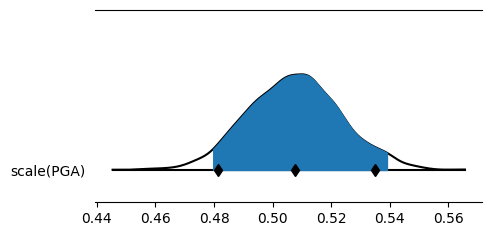

In [ ]:
# Hago la inferencia
results_1 = model_1.fit(chains=2,draws=2000, idata_kwargs={"log_likelihood": True})

# Grafico posterior de los parámetros
az.plot_forest( results_1, figsize=(5,2.5), var_names=['~Intercept'],
                kind='ridgeplot', combined=True,
                ridgeplot_quantiles=[.05, .5, .95], ridgeplot_overlap=4, ridgeplot_truncate=False)
plt.show()

In [ ]:
results_1

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

#### Actividad 3

Nos interesa entender un poco más qué nos está diciendo este modelo respecto a la influencia del **PGA**. Para ello, nos hacemos la siguiente pregunta:

¿Cuánto varia la probabilidad de colapso entre PGA=15 y PGA=50?

**Actividad**: Graficamente la distribución de $p_{col}$ cuando PGA=15 y PGA=50 en dos subfiguras.

*Ayuda*: Recuerde que esto implica generar nuevas simulaciones de la posterior para nuevos datos. Guarde ese Inference Data en una variable `pp0`.

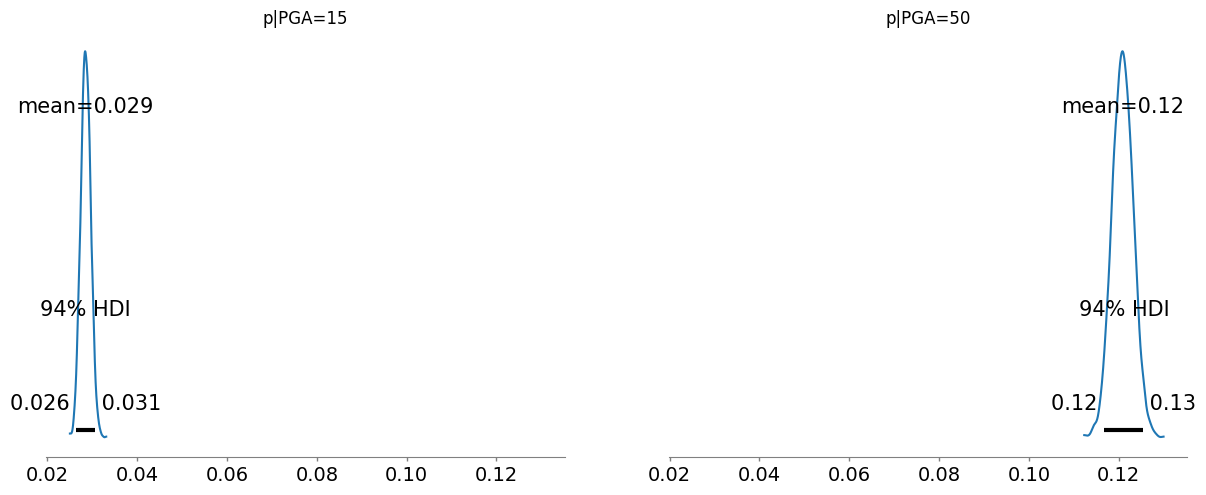

In [ ]:
# CODIGO DEL ALUMNO ############################################################
pp0 =





################################################################################
plt.show()

del pp0

### Curva de fragilidad distinguiendo por tipología de estructura y fundación

El segundo modelo que vamos a construir es uno en el que la probabilidad de colapso es igual depende ya no solo $PGA$ sino también de la tipología estructural y el tipo de fundación:

$$colapso \sim Bernoulli(logit(p_{col})=A+B\cdot PGA+C\cdot Structure + D\cdot Fondation)$$

es decir,

$$p_{col} = \frac{1}{1+e^{-(A+B\cdot PGA+C\cdot Structure + D\cdot Fondation)}}$$

Noten que, para este modelo, la influencia de la fundación y la estructura no interactuan entre sí.

#### Actividad 4

**Actividad**: Construya en `Bambi` el modelo indicado.

*NOTA*: Se recomienda escalar las variables.

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model_2 =
################################################################################

# Construyo el modelo
model_2.build()
model_2.graph()

Output()

Output()

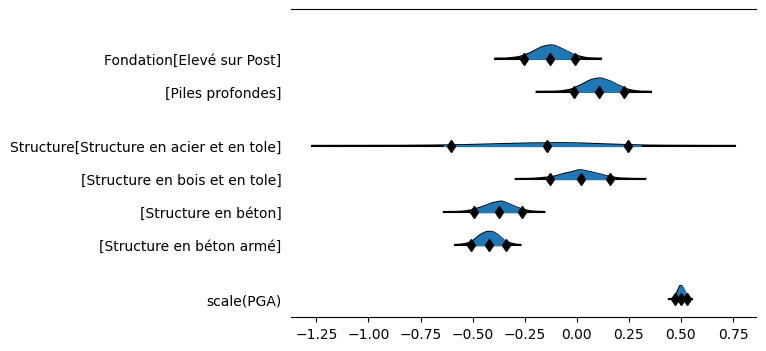

In [ ]:
# Hago la inferencia
results_2 = model_2.fit(chains=2,draws=2000, idata_kwargs={"log_likelihood": True})

# Grafico posterior de los parámetros
az.plot_forest( results_2, figsize=(6,4), var_names=['~Intercept'],
                kind='ridgeplot', combined=True,
                ridgeplot_quantiles=[.05, .5, .95], ridgeplot_overlap=1, ridgeplot_truncate=False)
plt.show()

#### Actividad 5

**Actividad**: En base a las distribuciones posteriores de los parámetros vista arriba, ¿qué variables parecen influir más? Para las variables categóricas, indique el significado de los parámetros, incluyendo cualquier categoría de referencia si la hay.



**Su respuesta**:

#### Actividad 6

**Actividad**: Construya un gráfico (o varios) de forma tal de mostrar para cada combinación de fundación y tipología estructural, su probabilidad de colapso en función del $PGA$ entre 0 y 100.

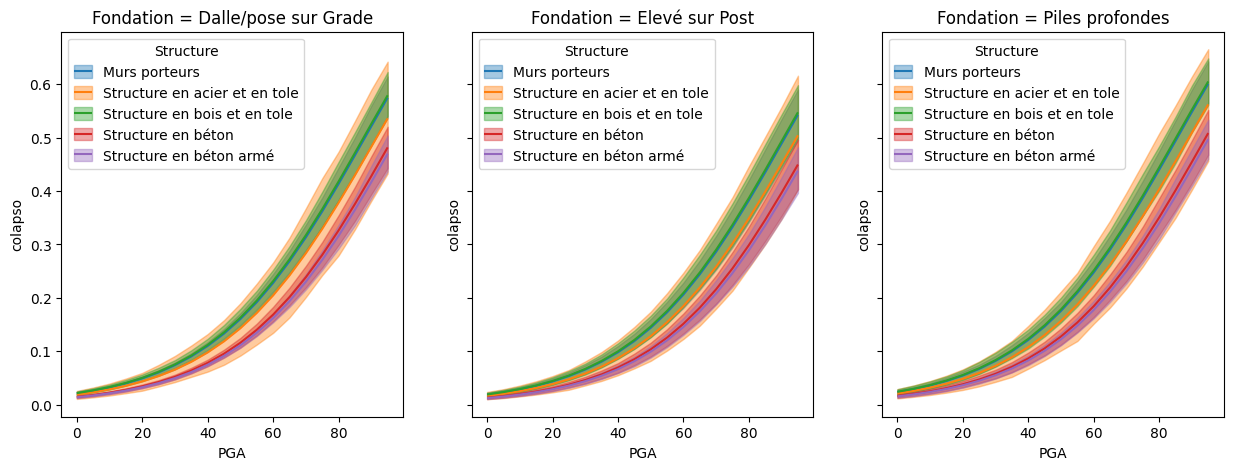

In [ ]:
# CODIGO DEL ALUMNO ############################################################







################################################################################
plt.show()

### Comparación de modelos

Ahora veamos cuál de los dos modelos se ajusta mejor a los datos, estimando su capacidad predictiva out-of-sample.

#### Actividad 7

**Actividad**: A partir de `elpd`, determine el modelo más aduecuado para los datos. ¿Aporta información conocer las tipologías estructurales?

In [ ]:
# CODIGO DEL ALUMNO ############################################################




az_comp_loo =
################################################################################
az_comp_loo

# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

**Su respuesta**:

In [ ]:
del results_1, results_2, df_haiti, az_comp_loo

## Ejercicio 2: Clasificación de aguas superficiales de México

En este ejercicio vamos a proponer un modelo de regresión para clasificar las aguas superficiales de los principales cuerpos superficiales de México, según su calidad.

### Introducción

La Comisión Nacional del Agua (CONAGUA), a través de la Red Nacional de Medición de Calidad del Agua, realiza el monitoreo de los principales cuerpos de agua de México en sus más de 1723 sitios de muestreo. Los datos que utilizaremos fueron obtenidos desde el siguiente link: https://www.gob.mx/conagua/articulos/calidad-del-agua

### Carga del Dataset

Empecemos abriendo el archivo en Google Colab

In [ ]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving aguas_superficiales.csv to aguas_superficiales.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['aguas_superficiales.csv']))
df.head()

,Unnamed: 0,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,...,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_D_48_FON_UT,TOX_FIS_SUP_15_UT,TOX_FIS_FON_15_UT,SEMAFORO,GRUPO
0,0,CARMINA 2,CARMINA 2,RÍO BRAVO,COAHUILA DE ZARAGOZA,ACUÑA,RÍO BRAVO 5,DATO PENDIENTE,LÓTICO,ARROYO,...,NaN,NaN,<1,<1,NaN,NaN,NaN,NaN,Amarillo,LOTICO
1,1,DLAGU0001RNL21,PRESA NATILLAS DE ABAJO,LERMA SANTIAGO PACÍFICO,AGUASCALIENTES,COSIO,RÍO SAN PEDRO,PRESA NATILLAS DE ABAJO,LÉNTICO,PRESA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rojo,LENTICO
2,2,DLAGU0002RNL21,PRESA EL JOCOQUI,LERMA SANTIAGO PACÍFICO,AGUASCALIENTES,RINCÓN DE ROMOS,RÍO SAN PEDRO,PRESA EL JOCOQUI,LÉNTICO,PRESA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verde,LENTICO
3,3,DLAGU0003RNL21,BORDO SANTA ELENA CORTINA,LERMA SANTIAGO PACÍFICO,AGUASCALIENTES,AGUASCALIENTES,PRESA EL NIÁGARA,PRESA SANTA ELENA,LÉNTICO,PRESA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rojo,LENTICO
4,4,DLAGU0004RNL21,HUMEDAL BUENAVISA DE PEÑUELAS CHARCA NO. 5,LERMA SANTIAGO PACÍFICO,AGUASCALIENTES,AGUASCALIENTES,PRESA AJOJUCAR,HUMEDAL BUENAVISA,LÉNTICO,HUMEDAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rojo,LENTICO


Observemos las columnas del dataset:

In [ ]:
df.columns

Index(['Unnamed: 0', 'CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO',
       'MUNICIPIO', 'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD',
       'LATITUD', 'PERIODO', 'DBO_mg/L', 'DQO_mg/L', 'SST_mg/L',
       'COLI_FEC_NMP_100mL', 'E_COLI_NMP_100mL', 'ENTEROC_NMP_100mL',
       'OD_PORC', 'OD_PORC_SUP', 'OD_PORC_MED', 'OD_PORC_FON', 'TOX_D_48_UT',
       'TOX_V_15_UT', 'TOX_D_48_SUP_UT', 'TOX_D_48_FON_UT',
       'TOX_FIS_SUP_15_UT', 'TOX_FIS_FON_15_UT', 'SEMAFORO', 'GRUPO'],
      dtype='object')

Este contiene, además de la información geográfica de las estaciones de muestreo, resultados de ensayos de calidad del agua, siendo sus variables:
- **Demanda Bioquímica de Oxígeno a cinco días: DBO**
- **Demanda Química de Oxígeno: DQO**
- **Sólidos Suspendidos Totales: SST**
- **Coliformes fecales: CF**
- **Escherichia coli: E_COLI**
- **Enterococos fecales: ENTEROC_FEC**
- **Porcentaje de saturación de Oxígeno Disuelto: OD**
- **Toxicidad aguda: TOX**

En base en estos indicadores, se clasifica el agua según su calidad, siguiendo una escala de tipo **semáforo** que considera 3 colores: **verde, amarillo y rojo**, correspondientes a buena calidad, aceptable y contaminada, respectivamente.

In [ ]:
# Cantidad de aguas de cada categoría:
df['SEMAFORO'].value_counts()

,count
SEMAFORO,
Verde,2326
Amarillo,2076
Rojo,1823


### Análisis Exploratorio de Datos

En primer lugar, vamos a analizar los datos y a limpiarlos, para luego desarrollar el modelo.

Nosotros trabajaremos con las aguas de tipo **lótico**. Además, conservaremos únicamente las columnas relacionadas con la calidad de agua (no los datos geográficos).

In [ ]:
df = df[df['GRUPO'] == 'LOTICO']

In [ ]:
# Selección de variables sobre calidad del agua de tipo lotico
df = df[['DBO_mg/L', 'DQO_mg/L', 'SST_mg/L', 'COLI_FEC_NMP_100mL','E_COLI_NMP_100mL',
         'ENTEROC_NMP_100mL', 'OD_PORC', 'TOX_D_48_UT', 'TOX_V_15_UT', 'SEMAFORO']].copy()

# Renombrar columnas
df.rename(columns={'DBO_mg/L': 'DBO',
                    'DQO_mg/L': 'DQO',
                    'SST_mg/L': 'SST',
                    'COLI_FEC_NMP_100mL': 'COLI',
                    'E_COLI_NMP_100mL': 'E_COLI',
                    'ENTEROC_NMP_100mL': 'ENTEROC',
                    'OD_PORC': 'OD',
                    'TOX_D_48_UT': 'TOX_D',
                    'TOX_V_15_UT': 'TOX_V'
                     },
            inplace=True)

#### Actividad 1

Utilizando `.info()`, vamos a analizar si el tipo de dato es el esperado: por ejemplo si la columna que debe contener textos, efectivamente sea de tipo `object` y las numéricas, `float` o `interger`, etc.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3372 entries, 0 to 6224
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DBO       3230 non-null   object
 1   DQO       3241 non-null   object
 2   SST       3218 non-null   object
 3   COLI      3234 non-null   object
 4   E_COLI    3159 non-null   object
 5   ENTEROC   43 non-null     object
 6   OD        3227 non-null   object
 7   TOX_D     3121 non-null   object
 8   TOX_V     3112 non-null   object
 9   SEMAFORO  3372 non-null   object
dtypes: object(10)
memory usage: 289.8+ KB


**Actividad**: Utilizando `replace()` haga las moficaciones que sean necesarias en los valores y convierta el tipo de dato.

NOTA: A fines del trabajo práctico, si un dato es indicado como `menor a X` asuma que vale directamente X. Para ver una forma más compleja de considerar datos censurados puede ver los ejercicios resueltos en las clases prácticas.

In [ ]:
# Limpieza
# CODIGO DEL ALUMNO ############################################################







################################################################################
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3372 entries, 0 to 6224
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   DBO       3230 non-null   float64 
 1   DQO       3241 non-null   float64 
 2   SST       3218 non-null   float64 
 3   COLI      3234 non-null   float64 
 4   E_COLI    3159 non-null   float64 
 5   ENTEROC   43 non-null     float64 
 6   OD        3227 non-null   float64 
 7   TOX_D     3121 non-null   float64 
 8   TOX_V     3112 non-null   float64 
 9   SEMAFORO  3372 non-null   category
dtypes: category(1), float64(9)
memory usage: 266.9 KB


**Pregunta:** ¿Existe una variable que no merece la pena incluir debido a la cantidad de datos?

**Respuesta:**

#### Actividad 2

A continuación se presenta un heatmap de correlación entre las potenciales variables predictoras.

**Actividad**: ¿Existen variables predictoras que aportarían información similar? ¿Qué podría pasar si se incluyen ambas en un modelo?

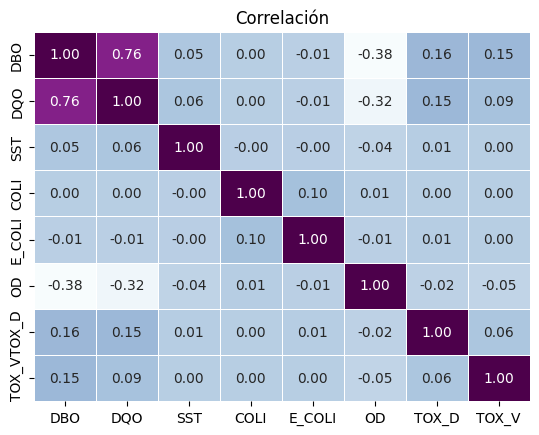

In [ ]:
feature_corr = ['DBO', 'DQO', 'SST', 'COLI', 'E_COLI', 'OD', 'TOX_D', 'TOX_V']
sns.heatmap(df[feature_corr].corr(), cmap='BuPu', fmt='.2f', annot=True, linewidths=.6, cbar=False).set(title='Correlación')
plt.show()

**Su Repuesta:**

#### Actividad 3

El DataFrame `df_new` va a ser nuestro dataset de cabecera para hacer la inferencia. A continuación, mostramos distintas estadísticas de los potenciales predictores.

In [ ]:
df_new = df[['DQO', 'SST', 'COLI', 'E_COLI', 'OD', 'TOX_D', 'TOX_V', 'SEMAFORO']].copy()
df_new.dropna(inplace = True)

df_new.describe()

,DQO,SST,COLI,E_COLI,OD,TOX_D,TOX_V
count,3052.000000,3052.000000,3.052000e+03,3.052000e+03,3052.000000,3052.000000,3052.000000
mean,82.854117,114.408303,3.604824e+05,3.757695e+04,68.308882,2.788434,17.968823
std,295.516167,1120.535180,1.230317e+07,5.410151e+05,29.449573,26.203681,606.986305
min,10.000000,10.000000,3.000000e+00,3.000000e+00,10.000000,1.000000,1.000000
25%,14.037500,11.000000,1.376000e+03,1.450000e+02,50.137500,1.000000,1.000000
50%,26.582500,26.000000,3.873000e+03,8.315000e+02,73.550000,1.000000,1.000000
75%,57.237500,64.757500,2.400000e+04,7.800000e+03,91.700000,1.000000,1.822500
max,7900.000000,57880.000000,4.804210e+08,1.950598e+07,152.700000,1250.000000,33333.330000


**Actividad**: ¿Qué puede decir de la tabla anterior? Analice dispersiones, valores medios y extremos entre las variables, y rangos de valores. ¿Qué opciones hay para

- Recudir el rango de valores de una variable y reducir la asimetría, pasando de un plano positivo a valores en todo el dominio de los reales?
- Asgurar que los datos tengan todos escalas similares?

**Su Respuesta:**

### Datos de entrenamiento y de testeo

Antes de desarrollar los modelos, vamos a separar los datos en 2: uno para entrenar el modelo y el otro, para testearlo:

In [ ]:
import random

def split_data(df, train_size=0.8, random_state=42):
    random.seed(random_state)

    data = df.values.tolist()
    headers = df.columns.tolist()

    random.shuffle(data)
    index = int(len(data) * train_size)

    data_train = data[:index]
    data_test = data[index:]

    df_train = pd.DataFrame(data_train, columns=headers)
    df_test = pd.DataFrame(data_test, columns=headers)

    return df_train, df_test

# Corremos la función:
df_train, df_test = split_data(df=df_new, train_size=0.8, random_state=42)

df_train.head()

,DQO,SST,COLI,E_COLI,OD,TOX_D,TOX_V,SEMAFORO
0,14.010,10.00,2909.0,110.0,93.4,1.00,1.000,Amarillo
1,10.000,23.60,24196.0,1296.0,106.7,1.00,1.000,Amarillo
2,163.370,41.25,24000.0,11000.0,10.0,3.85,71.839,Rojo
3,10.565,10.00,2247.0,52.0,102.3,1.00,1.000,Amarillo
4,92.295,33.00,24000.0,4600.0,51.0,1.00,2.560,Rojo


### Modelo de regresión categórica

Ahora sí, contruya un modelo de regresión para predecir la probabilidad de ser clasificado con un color de semáforo en función de las variables predictoras.

#### Actividad 4

**Actividad**: Construya un modelo completo (no hace falta considerar interacciones) con las variables predictores. Aplique las transformaciones que crea necesarias en función de la Actividad anterior.

*NOTA*: Puede ser muy importante hacer algo para lograr la convergencia de las cadenas y mejorar la velocidad para generar las simulaciones.

In [ ]:
# Definir el modelo
# CODIGO DEL ALUMNO ############################################################
model_sem =
################################################################################

model_sem.build()
model_sem.graph()

In [ ]:
# Hago la inferencia estadística
results_sem = model_sem.fit(chains=4,draws=2000)

# Diagnóstico de la Cadena
az.plot_trace(results_sem, compact=False);
plt.tight_layout()
plt.show()

# Resumen de la inferencia
az.summary(results_sem)

### Análisis del modelo

#### Actividad 5

**Actividad**: En base a las distribuciones posteriores de los parámetros mostrada abajo, ¿qué variables parecen influir más? Para las variables categóricas, indique el significado de los parámetros, incluyendo cualquier categoría de referencia si la hay.

In [ ]:
# Grafico posterior de los parámetros
az.plot_forest( results_sem, figsize=(10,4), var_names=['~Intercept'],
                kind='ridgeplot', combined=True,
                ridgeplot_quantiles=[.05, .5, .95], ridgeplot_overlap=1, ridgeplot_truncate=False)
plt.show()

**Su respuesta**:

#### Actividad 6

**Actividad**: Simule valores de calificaciones de agua para el dataset de Testeo `df_test`. y obtenga la posterior predictiva como la categoría más elegida para cada dato.

In [ ]:
# Predicciones
# CODIGO DEL ALUMNO ############################################################
y_pps =



################################################################################

y_pps = np.array(y_pps)
y_pps.shape

Con estas simulaciones vamos a crear una matriz de confusión, que indica cuántas muestras se calificaron correctamente y cuáles no. La diagonal de la matriz son muestras calificadas correctamente.

In [ ]:
# Valores reales
y_true = df_test['SEMAFORO']

# Creamos un nuevo DataFrame
df_results = pd.DataFrame({'Actual': y_true, 'Predicted': y_pps})
df_results['Predicted']= df_results['Predicted'].astype("category")
df_results['Predicted'] =df_results['Predicted'].cat.rename_categories({0:'Amarillo',1:'Rojo',2:'Verde'})

# Calculamos la matriz de confusión
confusion_matrix2 = pd.crosstab(df_results['Actual'], df_results['Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix2

Predicted,Amarillo,Rojo,Verde
Actual,,,
Amarillo,278,11,3
Rojo,8,209,4
Verde,14,4,80


#### Actividad 7

**Actividad**: Utilizando la matriz de confusión (o la tablas `df_results`) calculada anteriormente, obtenga:

- el porcentaje de muestras de aguas de tipo **verdes** que fueron clasificadas como **no verdes**, es decir, un Falso Negativo de verde (FN) o error de tipo 2.
- el porcentaje de muestras que que efectivamente **no son verdes** pero se identificaron como tales, es decir, un Falso Positivo de verde (FP) o error de tipo 1.


In [ ]:
# Calculamos FN y FP
# CODIGO DEL ALUMNO ############################################################
fn =
fp =
################################################################################
print('Porcentaje de Falsos Negativos (Modelo 1)',round(fn*100,2),'%')
print('Porcentaje de Falsos Positivos (Modelo 1)',round(fp*100,2),'%')

Porcentaje de Falsos Negativos (Modelo 1) 18.37 %
Porcentaje de Falsos Positivos (Modelo 1) 1.36 %


## Ejercicio 3: Recurrencia de Sismos en distintas regiones de la Argentina

### Introducción

En este ejercicio vamos a tomar el dataset de sismos utilizado en la clase práctica de inferencia estadística, pero vamos a explotarlo un poco más utilizando un modelo de regresión lineal (generalizada).

Si recuerdan, la recurrencia sismos de magnitud moderada $M>M_{0}$ en una determinada región siguen habitualmente una distribución de Poisson:

$$y|Region,M_{0} \sim Poisson(\lambda = A_{Region})$$

cosa que pudimos verificar para la provincia de San Juan.

Ahora bien, es razonable pensar que los sismos más grandes ocurren menos que los sismos más chicos. Según la ley de Guttenberg-Richter, la recurencia de sismos de magnitud mayor a un valor $M_{i}$ está dada por:

$$y|Region,M_{0},M_{i} \sim Poisson(\log_{10}{\lambda} = a_{Region}\ - b_{Region}\left(M_{i}-M_{0}\right))$$

Es decir, que la recurrencia de sismos cae en forma exponencial con la Magnitud considerada ($b_{Region}$ es un número positivo).


### Datos

A continuación, cargamos el dataset con registros sísmicos ya filtrado según los lineamientos de Gardner-Knopoff. Los datos comprenden sismos de magnitud mayor a 5.0 entre 1974 y 2021.

In [ ]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving Sismos_TP4.csv to Sismos_TP4.csv


In [ ]:
#Se crea un DataFrame
df_sismos = pd.read_csv(io.BytesIO(uploaded['Sismos_TP4.csv']))
df_sismos.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Main,Region
0,1974-01-11 05:18:02.400000+00:00,-31.758,-68.376,122.0,5.4,mb,NaN,NaN,NaN,NaN,...,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,1.0,SanJuan
1,1974-01-23 21:43:51.300000+00:00,-32.165,-69.771,115.0,5.2,mb,NaN,NaN,NaN,NaN,...,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,1.0,SanJuan
2,1974-08-14 17:56:47+00:00,-32.743,-69.015,132.0,5.6,mb,NaN,NaN,NaN,NaN,...,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,1.0,SanJuan
3,1974-08-24 18:58:22.700000+00:00,-31.381,-67.378,32.0,5.4,mb,NaN,NaN,NaN,NaN,...,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,1.0,SanJuan
4,1975-11-17 06:45:47.200000+00:00,-31.548,-69.179,122.0,5.3,mb,NaN,NaN,NaN,NaN,...,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,1.0,SanJuan


El modelo de Poisson propuesto es uno que devuelve **Cantidad de sismos en N años con magnitud mayor (o igual) a $M_{i}$**, siendo N el número de años en el dataset (48) y $M_{i}$ la magnitud considerada. Consideremos que ya se ha verificado que el modelo de Poisson es el mejor (de forma similar a como se hizo en la práctica).

Para ello, necesitamos construir un dataframe que, para cada región y para cada Magnitud $M_{i}$ registrada en esa región, identifique la cantidad de sismos en el dataset que igualan o superan o su magnitud.

#### Actividad 1

En resumen, el dataframe a utilizar de nombre `df_p` tendrá 3 columnas:

- `Region`: La identificación de la provincia donde ocurrió el sismo, provista en el dataset.
- `M`: La magnitud considerada para realizar el conteo
- `N_sismos`: La cantidad de sismos en el dataset que igualaron o superaron la magnitud considerada en la región.

La cantidad de filas será la suma de las magnitudes diferentes vistas en cada región.

**Actividad**: Construya el dataframe `df_p` indicado.

*Ayuda*: La combinación de `groupby`, `sort_values`, `cumsum` y Gemini lo llevará por buen camino.

In [ ]:
# CODIGO DEL ALUMNO ############################################################




df_p =
################################################################################

df_p

,M,Region,N_sismos_48Y
0,5.0,SaltaJujuy,28
1,5.1,SaltaJujuy,21
2,5.3,SaltaJujuy,16
3,5.4,SaltaJujuy,12
4,5.5,SaltaJujuy,9
5,5.6,SaltaJujuy,8
6,5.8,SaltaJujuy,6
7,5.9,SaltaJujuy,2
8,6.9,SaltaJujuy,1
9,5.0,SanJuan,82


### Construcción del modelo

La expresión vista en la introducción puede rescribirse de la siguiente forma para escribirla en términos del **logaritmo natural** de $\lambda$ (que es como trabaja `Bambi` a través de la opción `link`)

$$y|Region,M_{0},M_{i} \sim Poisson(\log{\lambda} = a_{Region} \log{10} - b_{Region} \log{10} \left(M_{i}-M_{0}\right))$$

En nuestro caso, además, todos los datos se corresponden a un intervalo de tiempo de **48 años**. Como queremos obtener los parámetros para la reucrrencia anual (sismos por año), pero $\lambda$ está asociado a sismos en 48 años el modelo final resulta:

$$y|Region,M_{0},M_{i} \sim Poisson(\log{\lambda} = \log(N) + a_{Region} \log{10} - b_{Region} \log{10} \left(M_{i}-M_{0}\right))$$

con $N=48$.

En resumen
- La cantidad de sismos de Magnitud mayor a $M_{i}$ en 48 años sigue una distribución de Poisson de parámetro $\lambda$
- $\lambda$ sigue una recta logarítmica con $M_{i}$. Hay dos parámetros a definir en cada región de análisis:
 - $a_{Region}$: Es el logaritmo en base 10 de la recurrencia de sismos por año mayores a $M_{0}$ (en este caso, 5.0)
 - $b_{Region}$: Representa la caida de la recurencia a la medida que se consideran sismos de mayor magnitud.

**NOTA**: Si se hace un cambio de variables y un pequeño trabajo algebraico:
- $A_{Region} = \log(N) + a_{Region} \log{10}$, y
- $B_{Region}= b_{Region} \log{10}$

El modelo se simplifica a:

$$y|Region,M_{0},M_{i} \sim Poisson(\log{\lambda} = A_{Region} + B_{Region} \left(M_{0}-M_{i}\right))$$

Donde
- $A_{Region}$: Es el logaritmo natural de la recurrencia de sismos en $N$ (48) años mayores a $M_{0}$ (en este caso, 5.0)
- $B_{Region}$: Representa la caida de la recurencia a la medida que se consideran sismos de mayor magnitud, en otra escala (exponencial con base $e$ en vez de 10).


#### Actividad 2

**Actividad**: Construya en `Bambi` el modelo indicado arriba. Se recomienda trabajar con la expresión más simplificada presentada al final. Luego podrá hacer las transformaciones de las simulaciones según lo considere pertinente para alguna actividad.

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model_p =
################################################################################

model_p.build()
model_p.graph()

In [ ]:
# Hago la inferencia estadística
results_p = model_p.fit(chains=4,draws=2000)

# Diagnóstico de la Cadena
az.plot_trace(results_p, compact=False);
plt.tight_layout()
plt.show()

# Resumen de la inferencia
az.summary(results_p)

### Análisis del modelo

#### Actividad 3

En la bibliografía se indica que el parámetro $b$ en zonas sísmicamente activas (como son las evaluadas en este TP) suele ser muy cercano a 1. Es decir, que un sismo de magnitud $5.0$ es 10 veces más probable que uno de magnitud $6.0$ y 100 veces más probable que uno de magnitud $7.0$. Tanto es así que suele adoptarse como 1 en general a falta de mejor información.

**Actividad**: ¿Hay razones para pensar, con un 68% de confianza (+/- un desvío), que el parámetro $b$ es distinto de 1 en alguna de las regiones? Conteste a través de un test de hipótesis.

*Nota: Es probable que sea necesario hacer una transformación, según cómo haya definido el modelo*

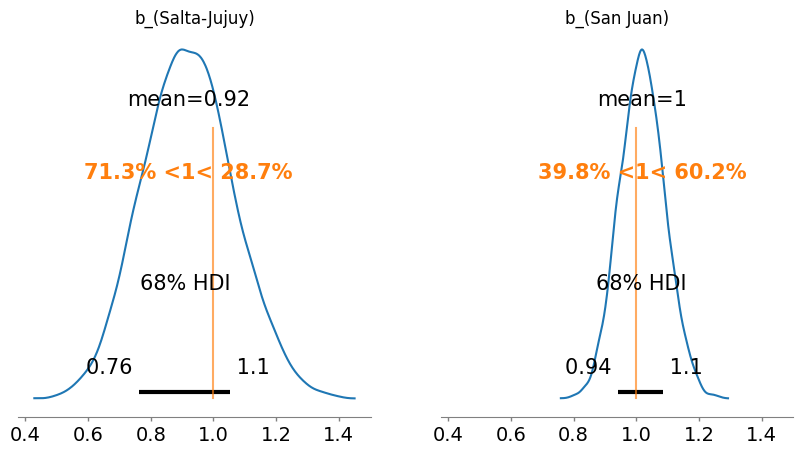

In [ ]:
# CODIGO DEL ALUMNO ############################################################






################################################################################

**Su respuesta**:

#### Actividad 4

**Actividad**: Construya una figura con dos gráficos que muestren:

- A la izquierda, la posterior y el intervalo de confianza de 90% de $\lambda$ en función de $M$ para cada región. Incluya también los datos para verificar el ajuste.
- A la izquierda, la posterior predictiva y el intervalo de confianza de 90% de nuevas simulaciones de conteos de sismos en 48 años. Incluya también los datos para verificar el ajuste.

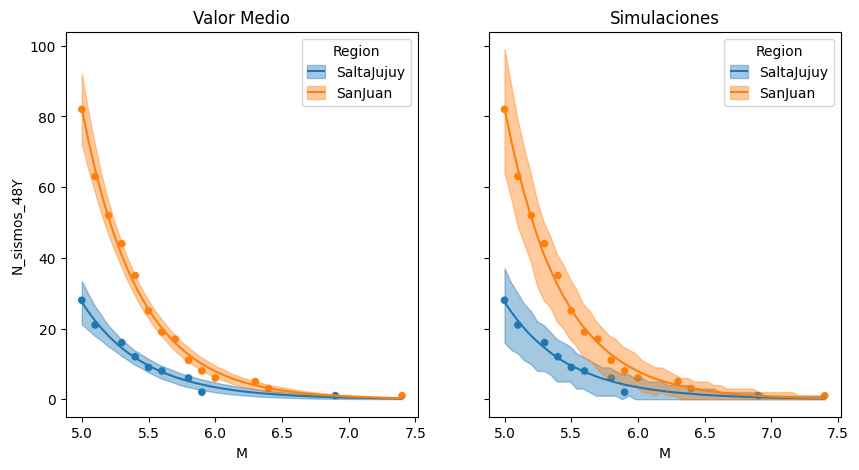

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,5),sharey=True)

# CODIGO DEL ALUMNO ############################################################







################################################################################

plt.show()

# Entrega del Trabajo Práctico

Para la entrega del TP4, siga los siguientes pasos:
1. Vuelva a correr el Colab desde 0 para asegurar que no haya ningún bug y todo funcione tal como se desea (`Disconnect and delete runtime`,`run all`)
2. Revise que todos los resultados estén presentes y como ustedes esperaban.
3. Asegúrese haber contestado todas la preguntas que requieren prosa.
4. Descargue el arcihvo .ipynb en su computadora

Revise que está todo como les gusta y ¡ya está listo! Ustedes son responables de que la entrega refleje sus intenciones, más allá de que nosotros podamos correr su archivo para revisar.

Los datos presentados abajo intentan ser para ustedes (y para nosotros) una verificación de que efectivamente han hecho la revisión final.

In [ ]:
print('Inicio de corrida: ',start_datetime)

end_datetime = datetime.datetime.now()
print('Fin de corrida: ',end_datetime)

elapsed_time = end_datetime-start_datetime
print('Tiempo de ejecución: ',round(elapsed_time.total_seconds()/60,1),'minutos')